<a href="https://colab.research.google.com/github/somendra-n/spamemailprediction/blob/main/spamemailprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from sklearn.svm import SVC

nltk.download('stopwords')
df = pd.read_csv('/content/spam_data.csv', encoding='latin-1')
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:

print(df.columns)



Index(['Category', 'Message'], dtype='object')


In [ ]:
df = df[['Category', 'Message']]
df.columns = ['label', 'message']

df['label'] = df['label'].map({'spam': 1, 'ham': 0})

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['message'] = df['message'].apply(clean_text)


X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#  Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)

# Predict using NBM
y_pred_nb = nb_model.predict(X_test_vect)

In [ ]:
print("Naive Bayes Model Evaluation:")
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Model Evaluation:
Accuracy:  0.9665071770334929
Confusion Matrix:
 [[1448    0]
 [  56  168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.75      0.86       224

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



In [ ]:
#  (ID3 algorithm)
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train_vect, y_train)

y_pred_dt = dt_model.predict(X_test_vect)

print("Decision Tree (ID3) Model Evaluation:")
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree (ID3) Model Evaluation:
Accuracy:  0.9575358851674641
Confusion Matrix:
 [[1424   24]
 [  47  177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1448
           1       0.88      0.79      0.83       224

    accuracy                           0.96      1672
   macro avg       0.92      0.89      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
#  Naive Bayes (using GridSearchCV)
params_nb = {'alpha': [0.1, 0.5, 1.0, 2.0, 3.0]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid=params_nb, cv=5)
grid_nb.fit(X_train_vect, y_train)
best_nb = grid_nb.best_estimator_
y_pred_best_nb = best_nb.predict(X_test_vect)
print("Best Naive Bayes Model Evaluation (with GridSearchCV):")
print("Accuracy: ", accuracy_score(y_test, y_pred_best_nb))


Best Naive Bayes Model Evaluation (with GridSearchCV):
Accuracy:  0.9796650717703349


In [ ]:
#  (ID3 algorithm)
params_dt = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=params_dt, cv=5)
grid_dt.fit(X_train_vect, y_train)
best_dt = grid_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test_vect)
print("Best Decision Tree Model Evaluation (with GridSearchCV):")
print("Accuracy: ", accuracy_score(y_test, y_pred_best_dt))

Best Decision Tree Model Evaluation (with GridSearchCV):
Accuracy:  0.9563397129186603


In [ ]:
# Visualizing the results
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

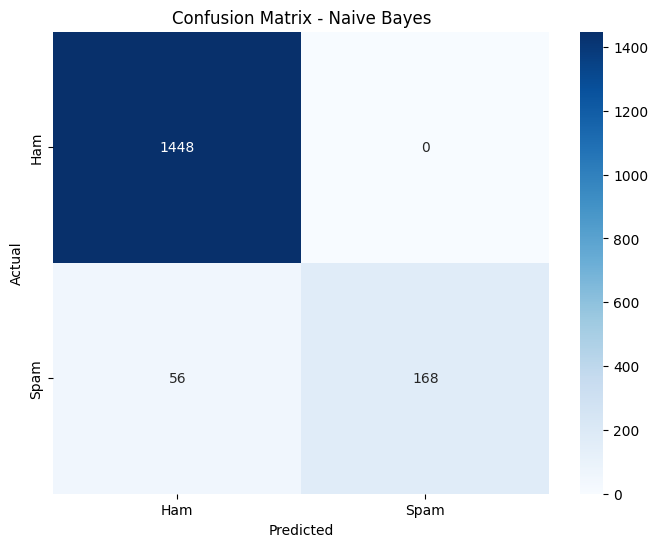

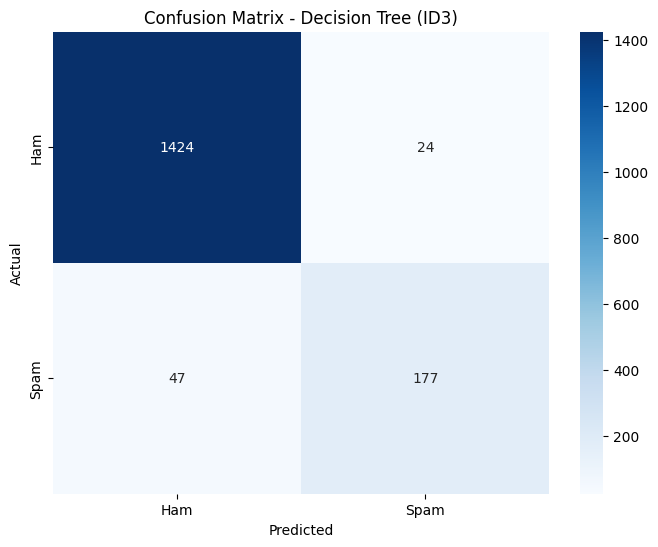

<Figure size 640x480 with 0 Axes>

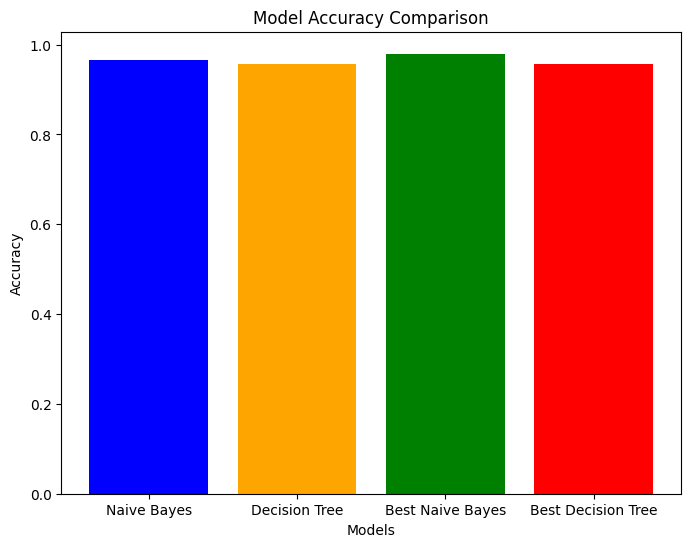

In [ ]:
# Plot Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, "Naive Bayes")

# Plot Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, "Decision Tree (ID3)")


plt.subplots_adjust(hspace=0.5)

# Compare accuracy of both models using bar plot
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_best_nb = accuracy_score(y_test, y_pred_best_nb)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)

plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Decision Tree', 'Best Naive Bayes', 'Best Decision Tree'],
        [accuracy_nb, accuracy_dt, accuracy_best_nb, accuracy_best_dt], color=['blue', 'orange', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

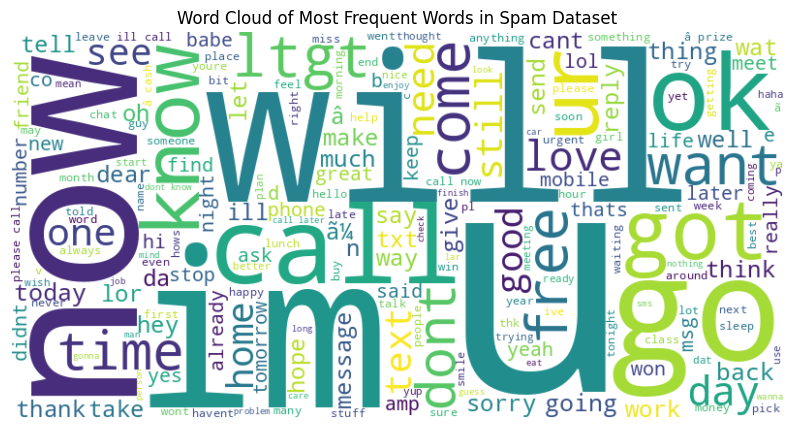

In [ ]:
text = ' '.join(df['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Spam Dataset")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display Results for Naive Bayes
print("Naive Bayes Model Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall (Ratio): {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}\n")

# Display Results for Decision Tree
print("Decision Tree (ID3) Model Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall (Ratio): {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


Naive Bayes Model Metrics:
Accuracy: 0.9665
Precision: 1.0000
Recall (Ratio): 0.7500
F1 Score: 0.8571

Decision Tree (ID3) Model Metrics:
Accuracy: 0.9575
Precision: 0.8806
Recall (Ratio): 0.7902
F1 Score: 0.8329


SVM Model Evaluation:
Accuracy:  0.986244019138756
Confusion Matrix:
 [[1443    5]
 [  18  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



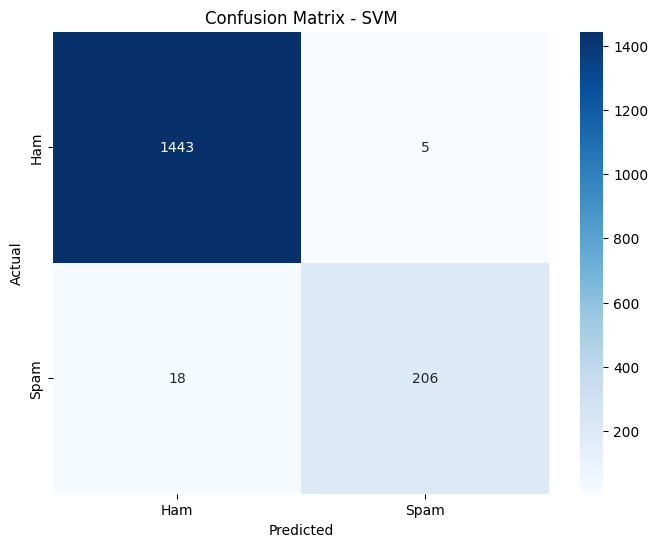

SVM Model Metrics:
Accuracy: 0.9862
Precision: 0.9763
Recall (Ratio): 0.9196
F1 Score: 0.9471



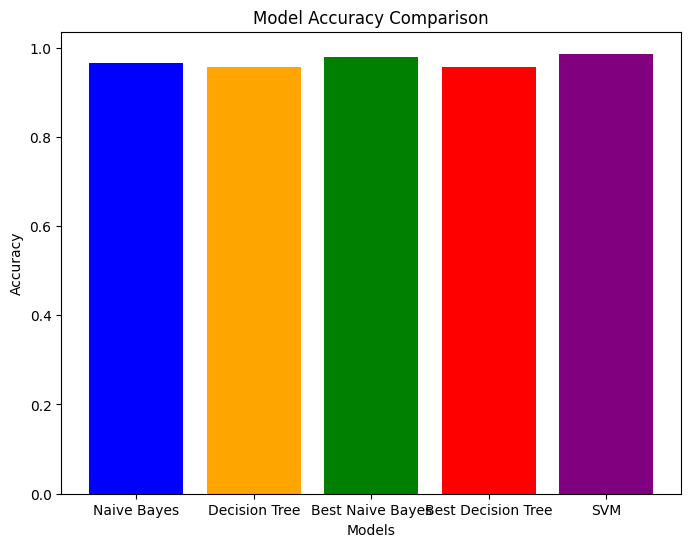

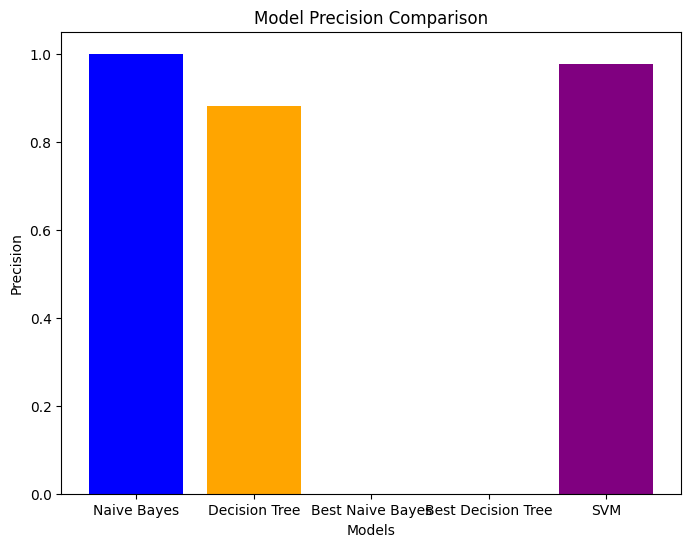

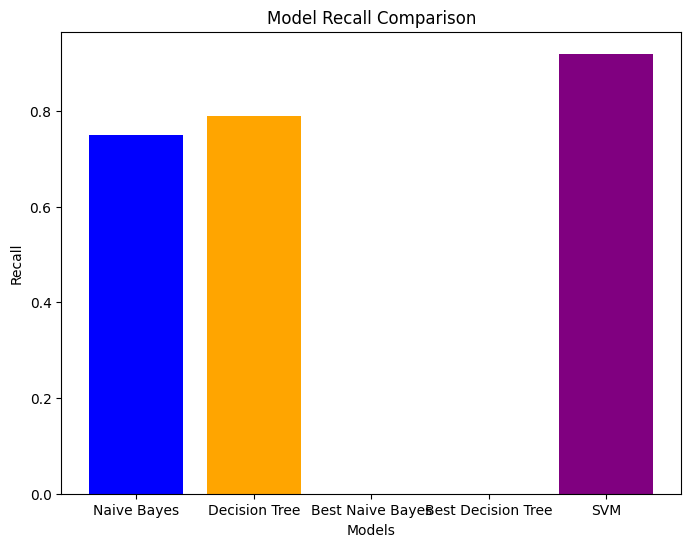

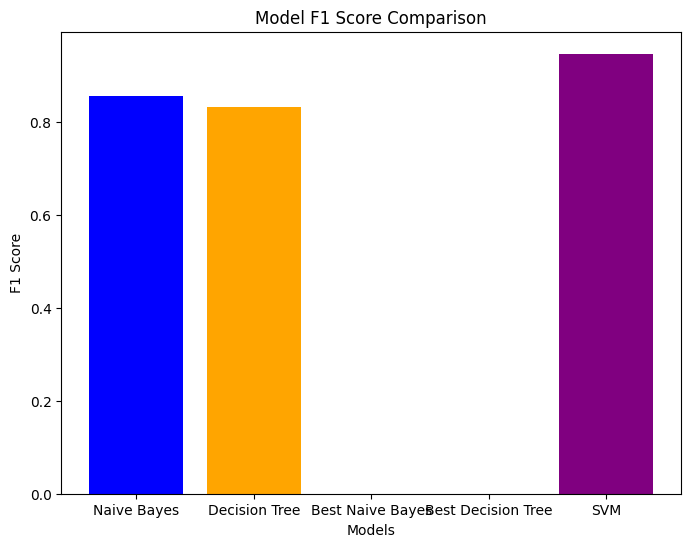

In [ ]:


# Train an SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel
svm_model.fit(X_train_vect, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test_vect)

print("SVM Model Evaluation:")
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Visualizing the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM")

# Evaluate SVM model using other metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Compare accuracy of all models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_best_nb = accuracy_score(y_test, y_pred_best_nb)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)

# Display Results for SVM
print("SVM Model Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall (Ratio): {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}\n")

# Plotting Accuracy Comparison for Naive Bayes, Decision Tree, and SVM
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Decision Tree', 'Best Naive Bayes', 'Best Decision Tree', 'SVM'],
        [accuracy_nb, accuracy_dt, accuracy_best_nb, accuracy_best_dt, accuracy_svm],
        color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# Compare Precision Scores for all models
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Decision Tree', 'Best Naive Bayes', 'Best Decision Tree', 'SVM'],
        [precision_nb, precision_dt, 0, 0, precision_svm],  # Set '0' for models that aren't evaluated for precision
        color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Model Precision Comparison")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.show()

# Compare Recall Scores for all models
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Decision Tree', 'Best Naive Bayes', 'Best Decision Tree', 'SVM'],
        [recall_nb, recall_dt, 0, 0, recall_svm],  # Set '0' for models that aren't evaluated for recall
        color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Model Recall Comparison")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.show()

# Compare F1 Scores for all models
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayes', 'Decision Tree', 'Best Naive Bayes', 'Best Decision Tree', 'SVM'],
        [f1_nb, f1_dt, 0, 0, f1_svm],  # Set '0' for models that aren't evaluated for F1 score
        color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Model F1 Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.show()

# Based on the comparison of metrics, you can decide which model is best.


In [ ]:

# Displaying the evaluation metrics for each model

print("Naive Bayes Model Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall (Ratio): {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}\n")

print("Decision Tree (ID3) Model Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall (Ratio): {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}\n")

print("SVM Model Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall (Ratio): {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}\n")


Naive Bayes Model Metrics:
Accuracy: 0.9665
Precision: 1.0000
Recall (Ratio): 0.7500
F1 Score: 0.8571

Decision Tree (ID3) Model Metrics:
Accuracy: 0.9575
Precision: 0.8806
Recall (Ratio): 0.7902
F1 Score: 0.8329

SVM Model Metrics:
Accuracy: 0.9862
Precision: 0.9763
Recall (Ratio): 0.9196
F1 Score: 0.9471

